In [1]:
#importing the modules...
import torch
import torch.nn as nn
from torch.utils.data import DataLoader,Dataset
import matplotlib.pyplot as plt

In [2]:
# Dataset class declaration
def output(x):
  y=((-2/3)*x )+2
  return y
class Dataset(Dataset):
  def __init__(self):
    self.data=torch.FloatTensor([1,2,3,4,5])
  def __getitem__(self,index):
    x=torch.FloatTensor([self.data[index]])
    y=torch.FloatTensor([output(x)])
    return x,y
  def __len__(self):
    return len(self.data)

In [25]:
#hyper parameters
lr=0.01
epochs=100
in_features=1
out_features=1
batch_size=3
custom_weights=torch.tensor([0.0])
custom_bias=torch.tensor([0.0])

#data
dataset=Dataset()
dataloader=DataLoader(dataset=dataset,batch_size=batch_size,shuffle=False)

In [15]:
#creating the model...
class LR(nn.Module):
  def __init__(self,in_features,out_features):
    super().__init__()
    self.fc1=nn.Linear(in_features=in_features,out_features=out_features,bias=True)
  def forward(self,x):
    x=self.fc1(x)
    return x

In [26]:
#declaring the model...
model=LR(in_features,out_features)
loss_fn=nn.MSELoss(size_average=False)
optimizer=torch.optim.SGD(model.parameters(),lr=lr)

#Loading the custom weights to the model...
with torch.no_grad():
  model.fc1.weight.copy_(custom_weights)
  model.fc1.bias.copy_(custom_bias)


print(model.fc1.weight,model.fc1.bias)
print('.....................')


#training
model.train()
losses=[]
for epoch in range(epochs):
  print(model.fc1.weight,model.fc1.bias)
  total_loss=0
  for idx,(x,y) in enumerate(dataloader):
    optimizer.zero_grad()
    pred=model(x)
    loss=loss_fn(pred,y)
    total_loss+=loss
    loss.backward()
    optimizer.step()
  print(f'Epoch: {epoch+1}/{epochs} Total Loss: {total_loss}')
  losses.append(total_loss.item())
  print('.....................................................')


/usr/local/lib/python3.10/dist-packages/torch/nn/_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


Parameter containing:
tensor([[0.]], requires_grad=True) Parameter containing:
tensor([0.], requires_grad=True)
.....................
Parameter containing:
tensor([[0.]], requires_grad=True) Parameter containing:
tensor([0.], requires_grad=True)
Epoch: 1/100 Total Loss: 5.7582221031188965
.....................................................
Parameter containing:
tensor([[-0.1843]], requires_grad=True) Parameter containing:
tensor([-0.0112], requires_grad=True)
Epoch: 2/100 Total Loss: 4.90524959564209
.....................................................
Parameter containing:
tensor([[-0.2100]], requires_grad=True) Parameter containing:
tensor([0.0236], requires_grad=True)
Epoch: 3/100 Total Loss: 4.772296905517578
.....................................................
Parameter containing:
tensor([[-0.2205]], requires_grad=True) Parameter containing:
tensor([0.0620], requires_grad=True)
Epoch: 4/100 Total Loss: 4.592884063720703
.....................................................
Pa

[5.7582221031188965, 4.90524959564209, 4.772296905517578, 4.592884063720703, 4.414616584777832, 4.242738723754883, 4.077503681182861, 3.9186999797821045, 3.7660796642303467, 3.619403839111328, 3.478440761566162, 3.3429670333862305, 3.212770462036133, 3.087644338607788, 2.967391014099121, 2.851821184158325, 2.740752935409546, 2.634009838104248, 2.531424045562744, 2.4328339099884033, 2.338083505630493, 2.247023344039917, 2.1595091819763184, 2.0754036903381348, 1.9945738315582275, 1.9168918132781982, 1.8422355651855469, 1.7704869508743286, 1.7015327215194702, 1.6352636814117432, 1.57157564163208, 1.5103687047958374, 1.4515447616577148, 1.3950119018554688, 1.340680718421936, 1.288465976715088, 1.2382842302322388, 1.1900575160980225, 1.1437088251113892, 1.0991653203964233, 1.0563565492630005, 1.0152149200439453, 0.9756758213043213, 0.9376765489578247, 0.9011573791503906, 0.8660603761672974, 0.8323303461074829, 0.7999138236045837, 0.7687597274780273, 0.7388190031051636, 0.7100448608398438, 0

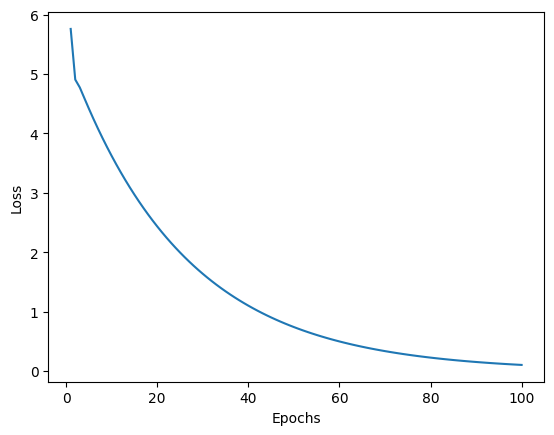

In [27]:
#ploting the Loss VS Epochs
eps=[ep for ep in range(1,epochs+1)]
print(losses)
plt.plot(eps,losses)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

In [28]:
#evaluating ...
predictions=[]
x_labels=[]
y_labels=[]
with torch.no_grad():
  model.eval()
  for idx,(x,y) in enumerate(dataloader):
    pred=model(x)

    x_labels.extend([xl.item() for xl in x])
    y_labels.extend(yl.item() for yl in y)
    predictions.extend(pl.item() for pl in pred)

print(f'Input labels: {x_labels}')
print(f'Output_labels: {y_labels}')
print(f'Predictions: {predictions}')


Input labels: [1.0, 2.0, 3.0, 4.0, 5.0]
Output_labels: [1.3333332538604736, 0.6666666269302368, 0.0, -0.6666667461395264, -1.3333334922790527]
Predictions: [1.1160389184951782, 0.5143222808837891, -0.0873943567276001, -0.6891109943389893, -1.2908275127410889]


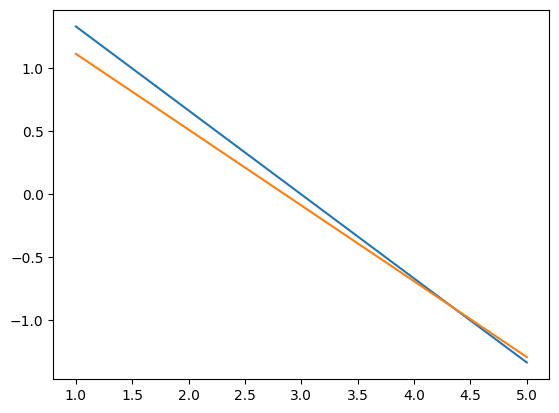

In [29]:
#plotting the output regression line...
plt.plot(x_labels,y_labels)
plt.plot(x_labels,predictions)
plt.show()